In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
import scipy.optimize as op

In [33]:
data = np.genfromtxt('../data/raw/ex2data2.txt',delimiter=",")
X = np.hstack([np.ones((len(data),1)), data])

In [40]:
def visualize(X):
    true_recs = X[X[:,3] == 1,:]
    false_recs = X[X[:,3] == 0,:]
    plt.figure(figsize=(16,8))
    plt.scatter(true_recs[:,1],true_recs[:,2],marker='+',color='g')
    plt.scatter(false_recs[:,1],false_recs[:,2],marker='o',color='r')
    plt.xlabel('Test 1 scores')
    plt.ylabel('Test 2 scores')
    plt.legend(('Passed', 'Not Passed'), bbox_to_anchor=(1.15, 1))
    plt.grid(color='gray', linestyle='--', linewidth=.6, axis='both', which='both', alpha=.4)
    plt.show();

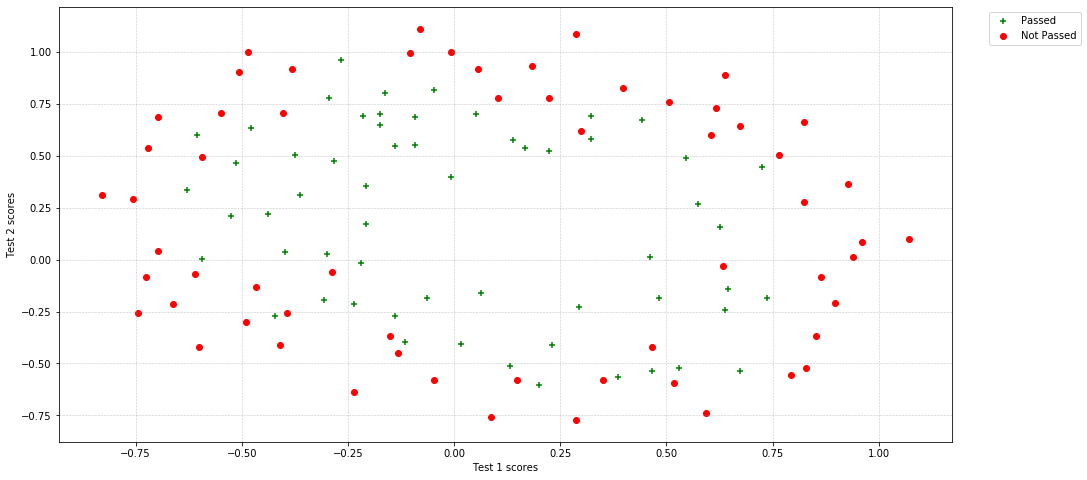

In [41]:
visualize(X)

In [37]:
file_name = '../processing/logistic_reg2.py'

In [42]:
%%writefile $file_name
#region imports
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as op
from os import path
#endregion

#region funcs
def visualize(X):
    true_recs = X[X[:,3] == 1,:]
    false_recs = X[X[:,3] == 0,:]
    plt.figure(figsize=(16,8))
    plt.scatter(true_recs[:,1],true_recs[:,2],marker='+',color='g')
    plt.scatter(false_recs[:,1],false_recs[:,2],marker='o',color='r')
    plt.xlabel('Test 1 scores')
    plt.ylabel('Test 2 scores')
    plt.legend(('Passed', 'Not Passed'), bbox_to_anchor=(1.15, 1))
    plt.grid(color='gray', linestyle='--', linewidth=.6, axis='both', which='both', alpha=.4)
    plt.show()
#endregion

def run():
    data = data = np.genfromtxt(path.join(path.dirname(__file__),'../data/raw/ex2data2.txt'),delimiter=",")
    X = np.hstack([np.ones((len(data),1)), data])
    visualize(X)


Overwriting ../processing/logistic_reg2.py
